In [2]:
import pandas as pd
df = pd.read_csv('unicorns till sep 2022.csv')
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


**Limpeza dos dados**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [4]:
df.duplicated().value_counts()

False    1186
dtype: int64

In [5]:
#Retirando o cifrão da coluna Valuation
df['Valuation ($B)'] = df['Valuation ($B)'].apply(lambda x: x.split('$')[-1])


In [6]:
#Transformando os valores da coluna Valuation para float
df['Valuation ($B)'] = df['Valuation ($B)'].astype(float)


In [7]:
#Transformando a coluna 'Date Joined' para tipo datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [8]:
#Criando uma coluna com o ano da fundação
df['Fundação'] = df['Date Joined'].dt.year

In [9]:
#Conferindo se os nomes dos Países estão corretos
df['Country'].unique()

array(['China', 'United States', 'Australia', 'United Kingdom', 'Bahamas',
       'India', 'Indonesia', 'Germany', 'Turkey', 'Hong Kong',
       'Seychelles', 'Sweden', 'Mexico', 'Estonia', 'Canada',
       'Netherlands', 'France', 'Israel', 'Finland', 'Colombia',
       'Belgium', 'Brazil', 'South Korea', 'Denmark', 'Switzerland',
       'Lithuania', 'Austria', 'Ireland', 'Singapore', 'Vietnam',
       'United Arab Emirates', 'Argentina', 'Spain', 'Japan',
       'Luxembourg', 'Nigeria', 'Philippines', 'Croatia', 'Senegal',
       'Malaysia', 'Bermuda', 'Norway', 'South Africa', 'Ecuador',
       'Chile', 'Thailand', 'Czech Republic', 'Italy'], dtype=object)

In [10]:
Asia = ['China', 'India', 'Indonesia', 'Turkey','Hong Kong','Israel','South Korea', 'Singapore','Vietnam','United Arab Emirates',
'Japan','Philippines','Malaysia','Thailand']
America = ['United States','Bahamas','Mexico','Canada','Colombia','Brazil','Argentina','Bermuda','Ecuador','Chile']
Africa = ['Seychelles', 'Nigeria','Senegal','South Africa']
Europa = ['United Kingdom','Germany','Sweden','Estonia','Netherlands','France','Finland','Belgium','Denmark','Switzerland',
'Lithuania','Austria','Ireland','Spain','Luxembourg','Croatia','Norway','Czech Republic']
Oceania = ['Australia']

In [11]:
#Criando coluna continentes
def continentes(linha):
    for x in Asia:
        if x in linha['Country']:
            linha['Continente'] = 'Asia'
    for y in America:
        if y in linha['Country']:
            linha['Continente'] = 'America'
    for i in Africa:
        if i in linha['Country']:
            linha['Continente'] = 'Africa'
    for a in Europa:
        if a in linha['Country']:
            linha['Continente'] = 'Europa'
    for b in Oceania:
        if b in linha['Country']:
            linha['Continente'] = 'Oceania'                               
    return linha


df = df.apply(continentes, axis=1)    

In [12]:
df

,City,Company,Continente,Country,Date Joined,Fundação,Industry,Investors,Valuation ($B)
0,Beijing,ByteDance,Asia,China,2017-04-07,2017,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0
1,Hawthorne,SpaceX,America,United States,2012-12-01,2012,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0
2,Shenzhen,SHEIN,Asia,China,2018-07-03,2018,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0
3,San Francisco,Stripe,America,United States,2014-01-23,2014,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0
4,Surry Hills,Canva,Oceania,Australia,2018-01-08,2018,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0
...,...,...,...,...,...,...,...,...,...
1181,Bengaluru,LeadSquared,Asia,India,2022-06-21,2022,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",1.0
1182,Chicago,FourKites,America,United States,2022-06-21,2022,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu...",1.0
1183,Burlington,VulcanForms,America,United States,2022-07-05,2022,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr...",1.0
1184,San Francisco,SingleStore,America,United States,2022-07-12,2022,Data management & analytics,"Google Ventures, Accel, Data Collective",1.0


In [13]:
#Conferindo os valores únicos das Industrias para ver se precisa de ajuste
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [14]:
#Transformando a coluna Industry em lista para fazer alterações
industria = df[df['Industry'].str.contains(',')]['Industry'].unique().tolist()
industria

['Supply chain, logistics, & delivery',
 'Sequoia Capital, Thoma Bravo, Softbank',
 'Tiger Global Management, Tiger Brokers, DCM Ventures',
 'Jungle Ventures, Accel, Venture Highway',
 'GIC. Apis Partners, Insight Partners',
 'Vision Plus Capital, GSR Ventures, ZhenFund',
 'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
 '500 Global, Rakuten Ventures, Golden Gate Ventures',
 'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
 'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
 'Dragonfly Captial, Qiming Venture Partners, DST Global',
 'SingTel Innov8, Alpha JWC Ventures, Golden Gate Ventures',
 'Mundi Ventures, Doqling Capital Partners, Activant Capital',
 'Vertex Ventures SE Asia, Global Founders Capital, Visa Ventures',
 'Andreessen Horowitz, DST Global, IDG Capital',
 "B Capital Group, Monk's Hill Ventures, Dynamic Parcel Distribution",
 'Temasek, Guggenheim Investments, Qatar Investment Authority']

In [15]:
#Tirando os nomes repetidos
industria_antes = list(set(industria))

#Criando a lista com os novos nomes para substituir
industria_depois = [n.split(',')[0] for n in industria_antes]

In [16]:
industria_depois

['Vision Plus Capital',
 'GIC. Apis Partners',
 'Mundi Ventures',
 'Sequoia Capital China',
 'Sequoia Capital China',
 'Andreessen Horowitz',
 'B Capital Group',
 'Dragonfly Captial',
 'Sequoia Capital',
 '500 Global',
 'Temasek',
 'Tiger Global Management',
 'SingTel Innov8',
 'Hopu Investment Management',
 'Vertex Ventures SE Asia',
 'Supply chain',
 'Jungle Ventures']

In [17]:
#Criando dicinário para substituição
dict_industria = {x:y for x,y in zip(industria_antes,industria_depois)}

In [18]:
df['Industry'].replace(dict_industria,inplace=True)

In [19]:
df['Industry'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services', 'Supply chain',
       'Data management & analytics', 'Sequoia Capital', 'Edtech',
       'Hardware', 'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi', 'Tiger Global Management', 'Jungle Ventures',
       'Artificial Intelligence', 'GIC. Apis Partners',
       'Vision Plus Capital', 'Hopu Investment Management', 'Internet',
       '500 Global', 'Sequoia Capital China', 'Dragonfly Captial',
       'SingTel Innov8', 'Mundi Ventures', 'Vertex Ventures SE Asia',
       'Andreessen Horowitz', 'B Capital Group', 'Temasek'], dtype=object)

In [20]:
#Com a duplicação da 'Artificial Intelligence', substitui para ficar com um termo apenas
inteligencia_artificial = {
    'Artificial intelligence': 'Artificial Intelligence'
}

df['Industry'].replace(inteligencia_artificial,inplace=True)

**Análise dos dados**

In [21]:
df

,City,Company,Continente,Country,Date Joined,Fundação,Industry,Investors,Valuation ($B)
0,Beijing,ByteDance,Asia,China,2017-04-07,2017,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0
1,Hawthorne,SpaceX,America,United States,2012-12-01,2012,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0
2,Shenzhen,SHEIN,Asia,China,2018-07-03,2018,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",100.0
3,San Francisco,Stripe,America,United States,2014-01-23,2014,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0
4,Surry Hills,Canva,Oceania,Australia,2018-01-08,2018,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0
...,...,...,...,...,...,...,...,...,...
1181,Bengaluru,LeadSquared,Asia,India,2022-06-21,2022,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West...",1.0
1182,Chicago,FourKites,America,United States,2022-06-21,2022,Supply chain,"Hyde Park Venture Partners, Bain Capital Ventu...",1.0
1183,Burlington,VulcanForms,America,United States,2022-07-05,2022,Supply chain,"Eclipse Ventures, D1 Capital Partners, Industr...",1.0
1184,San Francisco,SingleStore,America,United States,2022-07-12,2022,Data management & analytics,"Google Ventures, Accel, Data Collective",1.0


- Países com maiores valores acumulados das startups
- Top startups e Company
- Tratejória do crescimento das startups por ano
- Tipos de industria mais presentes no setor de startups
- Países com maiores quantidades de startups
- Startups no Brasil (tragetória,setor,capital)
- Análise por continente



In [22]:
#Acumulado por país
acumulado_paises = df.groupby('Country').agg({'Valuation ($B)':'sum'}).sort_values(by='Valuation ($B)',ascending=False)
acumulado_paises.head(10)

,Valuation ($B)
Country,
United States,2069.89
China,678.59
United Kingdom,205.45
India,202.92
Germany,80.88
France,58.42
Australia,54.40
Canada,49.23
Israel,48.02


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Trajetória de crescimento por ano
crescimento_anual = df.groupby('Fundação')['Company'].count().to_frame()
crescimento_anual

,Company
Fundação,
2007,1
2011,2
2012,4
2013,3
2014,12
2015,34
2016,21
2017,44
2018,98


In [25]:
#Tipos de industria mais presentes nas startups
tipo_industria = df['Industry'].value_counts().to_frame().reset_index()
tipo_industria.rename(columns={'index':'Industry', 'Industry':'Count'},inplace=True)
tipo_industria.head(10)


,Industry,Count
0,Fintech,239
1,Internet software & services,224
2,E-commerce & direct-to-consumer,103
3,Health,94
4,Artificial Intelligence,85
5,Supply chain,65
6,Other,65
7,Cybersecurity,58
8,Data management & analytics,45
9,Auto & transportation,40


In [26]:
#Países com maiores números de startups
paises_startups = df['Country'].value_counts().to_frame().reset_index()
paises_startups.rename(columns={'index':'Country','Country':'Qtd'},inplace=True)
paises_startups

,Country,Qtd
0,United States,636
1,China,174
2,India,70
3,United Kingdom,46
4,Germany,29
5,France,24
6,Israel,22
7,Canada,19
8,Brazil,17
9,South Korea,17


In [27]:
df.groupby('Continente').agg({'Company':'count'})

,Company
Continente,
Africa,5
America,689
Asia,329
Europa,154
Oceania,8


**Startups no Brasil**

In [28]:
#Startups no Brasil
df[df['Country'] == 'Brazil']

,City,Company,Continente,Country,Date Joined,Fundação,Industry,Investors,Valuation ($B)
132,Campinas,QuintoAndar,America,Brazil,2019-09-09,2019,E-commerce & direct-to-consumer,"Kaszek Ventures, General Atlantic, SoftBank Group",5.10
133,Sao Paulo,C6 Bank,America,Brazil,2020-12-02,2020,Fintech,Credit Suisse,5.05
158,Sao Paulo,Creditas,America,Brazil,2020-12-18,2020,Fintech,"Kaszek Ventures, Amadeus Capital Partners, Quo...",4.80
283,Sao Paulo,Nuvemshop,America,Brazil,2021-08-17,2021,E-commerce & direct-to-consumer,"Kaszek Ventures, Qualcomm Ventures, Accel",3.10
291,Sao Paulo,Wildlife Studios,America,Brazil,2019-12-05,2019,Other,"Benchmark, Bessemer Venture Partners",3.00
323,Sao Paulo,Loft,America,Brazil,2020-01-03,2020,E-commerce & direct-to-consumer,"Monashees+, Andreessen Horowitz, QED Investors",2.90
350,Sao Paulo,Unico,America,Brazil,2021-08-03,2021,Artificial Intelligence,"Big Bets, General Atlantic, SOFTBANK Latin Ame...",2.60
423,Sao Paulo,CloudWalk,America,Brazil,2021-09-08,2021,Fintech,"Plug and Play Ventures, Valor Capital Group, D...",2.15
470,Sao Paulo,Loggi,America,Brazil,2019-06-05,2019,Supply chain,"Qualcomm Ventures, SoftBank Group. Monashees+",2.00
643,Curitiba,Olist,America,Brazil,2021-12-15,2021,E-commerce & direct-to-consumer,"Redpoint e.ventures, Valor Capital Group, Soft...",1.50


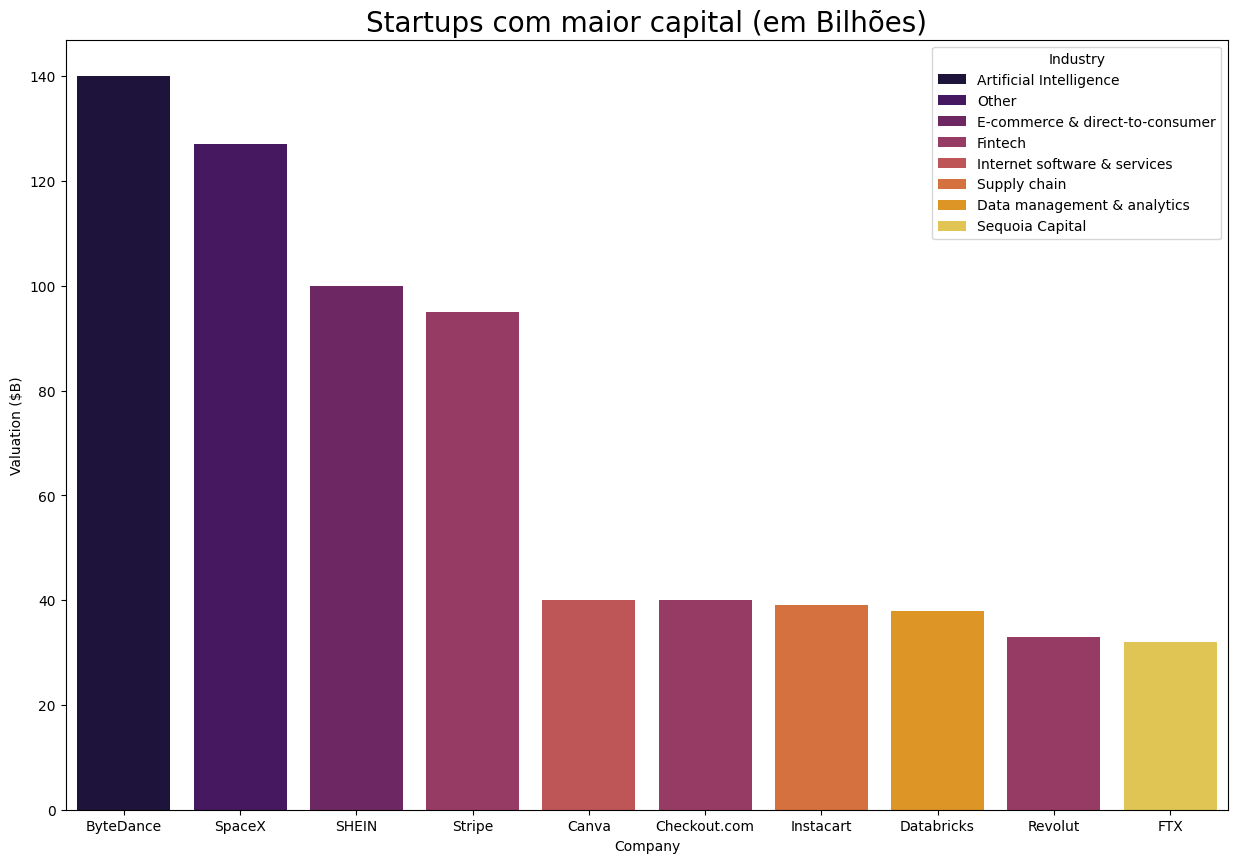

In [29]:
maiores_startups = df.sort_values(by='Valuation ($B)', ascending=False).head(10)
plt.figure(figsize=(15,10))
plt.title('Startups com maior capital (em Bilhões)', fontsize=20)
figure = sns.barplot(data=maiores_startups, x='Company', y='Valuation ($B)', hue='Industry', dodge=False, palette='inferno')

In [30]:
maiores_industrias = df.sort_values(by='Valuation ($B)', ascending=False).apply(lambda x: (x/maiores_startups.sum())*100).round(2)

figure = sns.barplot(data=maiores_industrias, x='Industry', y='Valuation ($B)', dodge=False, palette='icefire_r')


C:\Users\natha\AppData\Local\Temp\ipykernel_5472\2720965845.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  maiores_industrias = df.sort_values(by='Valuation ($B)', ascending=False).apply(lambda x: (x/maiores_startups.sum())*100).round(2)


TypeError: cannot perform __truediv__ with this index type: DatetimeArray